# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [3]:
# import packages and libraries
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

# define language for stop words
sw = stopwords.words("english")

In [52]:
# Add any additional import statements you need here
import nltk
#nltk.download('stopwords')
import os
import zipfile
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pandoc

In [43]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/marvi/GitHub Projects/tm-token-norm/M1 Assignment Data.zip"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "M1 Results/twitter/"
lyrics_folder = "M1 Results/lyrics/"

In [5]:
# define function for descriptive stats
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_total_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_total_tokens if num_total_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)

    # Get the most common tokens
    most_common_tokens = Counter(tokens).most_common(num_tokens)
    
    if verbose:        
        print(f"There are {num_total_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # Print the most common tokens
        print(f"The {num_tokens} most common tokens are:")
        for token, count in most_common_tokens:
            print(f"'{token}' appears {count} times")
        
    return [num_total_tokens, num_unique_tokens, lexical_diversity, num_characters]
    

In [6]:
# define examplet text to use with function
text = """here is some example text with other example text here in this text""".split()

# call function and display outputs
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 5 most common tokens are:
'text' appears 3 times
'here' appears 2 times
'example' appears 2 times
'is' appears 1 times
'some' appears 1 times


Q: Why is it beneficial to use assertion statements in your code? 

A: Using assertion statements helps in writing robust and error-free code by ensuring that certain conditions hold true at runtime. They make the debugging process easier and help developers write code that is more reliable and easier to maintain.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
# Read in the lyrics data

# Initialize a dictionary to store the contents of the lyrics files
lyrics_data = {}

# Open the zip file
with zipfile.ZipFile(data_location, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        if file_info.filename.startswith(lyrics_folder) and file_info.filename.endswith('.txt'):
            filename = os.path.basename(file_info.filename)
            if filename:
                with zip_ref.open(file_info.filename) as file:
                    lyrics_data[filename] = file.read().decode('utf-8')

# show lyrics with the filename as the key and content as the value
print(lyrics_data)

{'robyn_includemeout.txt': '"Include Me Out"\n\n\n\r\nIt is really very simple\r\nJust a single pulse, repeated at a regular interval\n\r\nMmm, hmm\r\nDon\'t include me out, no\r\nDon\'t include me out\n\r\nOne time for the records and the hits\r\nTwo for your money-maker, shake, boom\r\nThree times for the lucky and the dead\n\r\nOne time for the sorry and safe\r\nTwo for the beggar and his company\r\nThree times for the sinner and the saint\n\r\nYeah, bow down all you wicked and the vain\r\nBow to the miracle, the em, na, na\r\nThree times and the devil will be gone\n\r\nOne time for the fire, bring it on\r\nTwo for the boogie, gotta bang the beat\r\nThree times for the ladies, show me some love\n\r\nTalking \'bout everyone, every day, all day\n\r\nAnd if your world should fall apart\r\nThere\'s plenty room inside my heart\r\nJust don\'t include me out\r\nDon\'t include me out\n\r\nAnd if your world should fall apart\r\nI still got room inside my heart\r\nJust don\'t include me out\r

In [8]:
# Read in the twitter data

# Initialize a dictionary to store the contents of the twitter files
twitter_data = {}

# Open the zip file
with zipfile.ZipFile(data_location, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        if file_info.filename.startswith(twitter_folder) and file_info.filename.endswith('.txt'):
            print(f"Processing file: {file_info.filename}")
            
            # Extract the file name (e.g., twitter file)
            filename = os.path.basename(file_info.filename)
            if filename: 
                with zip_ref.open(file_info.filename) as file:
                    twitter_data[filename] = file.read().decode('utf-8')

# show twitter with the filename as the key and content as the value
print(twitter_data)

Processing file: M1 Results/twitter/cher_followers_data.txt
Processing file: M1 Results/twitter/robynkonichiwa_followers_data.txt
Processing file: M1 Results/twitter/cher_followers.txt
Processing file: M1 Results/twitter/robynkonichiwa_followers.txt


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [9]:
# Define the punctuation set and the stopwords set
punctuation = set(string.punctuation)

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    
    # Tokenize (split on whitespace)
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in sw]
    
    return tokens

# Function to read and clean data from a folder in a zip file
def read_and_clean_data_from_zip(zip_file_path, folder_path):
    cleaned_data = {}

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if file_info.filename.startswith(folder_path) and file_info.filename.endswith('.txt'):
                filename = os.path.basename(file_info.filename)
                if filename:
                    with zip_ref.open(file_info.filename) as file:
                        content = file.read().decode('utf-8')
                        cleaned_data[filename] = clean_and_tokenize(content)

    return cleaned_data

In [10]:
# create your clean twitter data here

# Read and clean lyrics data
lyrics_data_cleaned = read_and_clean_data_from_zip(data_location, lyrics_folder)

# Convert the cleaned data into a DataFrame for easier handling
df_lyrics = pd.DataFrame(list(lyrics_data_cleaned.items()), columns=['filename', 'cleaned_tokens'])

# Display cleaned data for lyrics dataset
print("Cleaned Lyrics Data:")
print(df_lyrics.head())

Cleaned Lyrics Data:
                 filename                                     cleaned_tokens
0  robyn_includemeout.txt  [include, really, simple, single, pulse, repea...
1      robyn_electric.txt  [electric, electric, electric, natural, high, ...
2     robyn_beach2k20.txt  [beach, 2k20, wanna, go, gonna, get, ok, call,...
3     robyn_lovekills.txt  [love, kills, youre, looking, love, get, heart...
4   robyn_timemachine.txt  [time, machine, hey, cant, believe, fit, threw...


In [11]:
# create your clean lyrics data here

# Read and clean twitter data
twitter_data_cleaned = read_and_clean_data_from_zip(data_location, twitter_folder)

# Convert the cleaned data into a DataFrame for easier handling
df_twitter = pd.DataFrame(list(twitter_data_cleaned.items()), columns=['filename', 'cleaned_tokens'])

# Display cleaned data for twitter dataset
print("Cleaned Twitter Data:")
print(df_twitter.head())

Cleaned Twitter Data:
                            filename  \
0            cher_followers_data.txt   
1  robynkonichiwa_followers_data.txt   
2                 cher_followers.txt   
3       robynkonichiwa_followers.txt   

                                      cleaned_tokens  
0  [screenname, name, id, location, followerscoun...  
1  [screenname, name, id, location, followerscoun...  
2  [id, 35152213, 742153090850164742, 14964630064...  
3  [id, 1424055675030806529, 1502717352575651840,...  


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [15]:
# calls to descriptive_stats here

# Create empty lists to store combined tokens for each artist
cher_tokens = []
robyn_tokens = []

# Loop through the cleaned lyrics data and group tokens by artist
for filename, tokens in lyrics_data_cleaned.items():
    if "cher" in filename: 
        cher_tokens.extend(tokens)
    elif "robyn" in filename:
        robyn_tokens.extend(tokens)

# Descriptive stats for cher
print("\nDescriptive stats for cher:")
descriptive_stats(cher_tokens, verbose=True)

# Descriptive stats for robyn
print("\nDescriptive stats for robyn:")
descriptive_stats(robyn_tokens, verbose=True)



Descriptive stats for cher:
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
The 5 most common tokens are:
'love' appears 1004 times
'im' appears 513 times
'know' appears 486 times
'dont' appears 440 times
'youre' appears 333 times

Descriptive stats for robyn:
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
The 5 most common tokens are:
'know' appears 308 times
'dont' appears 301 times
'im' appears 299 times
'love' appears 275 times
'got' appears 251 times


[15227, 2156, 0.14159059565245943, 73787]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If you leave stopwords in the data, the "top 5 words" will likely include common words such as "the", "is", "and", "a", and "in", which appear very frequently in natural language but do not provide much meaningful information about the text's content.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Not knowing much about the 2 artists, my prior belief is that the would be different in lexical diversity. However, turns out they are not significantly different after all.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [12]:
# Assert emoji recognition
assert emoji.is_emoji("❤️"), "The character ❤️ should be recognized as an emoji."
assert not emoji.is_emoji(":-)"), "The character :-) should not be recognized as an emoji."

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [14]:
# Define the extract_emojis function using regex to capture emojis
def extract_emojis(tokens):
    emoji_list = []
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"  # other symbols
        "\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE
    )
    # Find and extract all emojis from the token list
    emoji_list.extend(emoji_pattern.findall(''.join(tokens)))
    return emoji_list

# Function to extract emojis from a list of tokens
def most_common_emojis_by_artist(twitter_data):
    cher_emojis = []
    robyn_emojis = []

    # Collect emojis for artist1 and artist2 without printing each file's tokens
    for filename, tokens in twitter_data.items():
        if 'cher' in filename:
            cher_emojis.extend(extract_emojis(tokens))
        elif 'robyn' in filename:
            robyn_emojis.extend(extract_emojis(tokens))

    # Print only the most common emojis for each artist, limit to 10
    if cher_emojis:
        print("Top 10 Emojis for cher:")
        print(Counter(cher_emojis).most_common(10))

    if robyn_emojis:
        print("\nTop 10 Emojis for robyn:")
        print(Counter(robyn_emojis).most_common(10))

# Call the function to process twitter data without overwhelming output
most_common_emojis_by_artist(twitter_data_cleaned)

Top 10 Emojis for cher:
[('🌈', 39511), ('❤️', 32174), ('🏳️', 31508), ('✨', 28897), ('♥', 26144), ('❤', 22365), ('♡', 20297), ('♀️', 11879), ('💙', 10231), ('💜', 8292)]

Top 10 Emojis for robyn:
[('🌈', 3901), ('🏳️', 3208), ('♥', 2701), ('❤️', 2189), ('✨', 2079), ('♡', 1378), ('❤', 1324), ('♀️', 887), ('🇺🇦', 483), ('♂️', 479)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [24]:
# Function to extract hashtags from tokens
def extract_hashtags(tokens):
    hashtags = []
    i = 0
    while i < len(tokens):
        if tokens[i] == '#':
            if i + 1 < len(tokens):
                hashtag = '#' + tokens[i + 1]
                hashtags.append(hashtag)
            i += 2  
        elif tokens[i].startswith('#'):
            hashtags.append(tokens[i]) 
            i += 1
        else:
            i += 1
    return hashtags

# Find the 10 most common hashtags by artist
def most_common_hashtags_by_artist(twitter_data):
    cher_hashtags = []
    robyn_hashtags = []

    # Loop through each file (tweet) and its associated tokens
    for filename, tokens in twitter_data.items():
        if 'cher' in filename:
            cher_hashtags.extend(extract_hashtags(tokens))
        elif 'robyn' in filename:
            robyn_hashtags.extend(extract_hashtags(tokens))

    # Display the 10 most common hashtags for each artist
    if cher_hashtags:
        print("\nTop 10 Hashtags for Cher:")
        print(Counter(cher_hashtags).most_common(10))

    if robyn_hashtags:
        print("\nTop 10 Hashtags for Robyn:")
        print(Counter(robyn_hashtags).most_common(10))

# Test the code
most_common_hashtags_by_artist(twitter_data)

# Marvin's note: I could not get this code to work properly all the way!


Top 10 Hashtags for Cher:
[('#B', 38473), ('#T', 25482), ('#S', 22141), ('#R', 21395), ('#F', 18277), ('#L', 17112), ('#M', 16289), ('#A', 15058), ('#C', 14320), ('#P', 13393)]

Top 10 Hashtags for Robyn:
[('#B', 2025), ('#T', 1790), ('#S', 1547), ('#M', 1178), ('#A', 1079), ('#L', 1078), ('#s', 1071), ('#P', 1021), ('#F', 1003), ('#b', 991)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [34]:
# Download the stopwords corpus if not already done
nltk.download('stopwords')

# Redefine the stopwords set correctly and rename to avoid conflict
common_stopwords = set(stopwords.words('english'))

# Function to extract the song title (first line) from the lyrics text
def extract_song_title(lyrics_text):
    # Split the lyrics text by lines and return the first line
    return lyrics_text.split('\n')[0].strip()

# Function to clean and tokenize the title, removing stopwords
def clean_and_tokenize_title(title):
    # Tokenize by splitting on whitespace and removing punctuation
    tokens = re.findall(r'\b\w+\b', title.lower())  # Convert to lowercase and remove punctuation
    # Filter out stopwords
    return [token for token in tokens if token not in common_stopwords]

# Function to find the 5 most common words in song titles by artist
def most_common_words_in_titles_by_artist(lyrics_data):
    cher_words = []
    robyn_words = []

    # Loop through each file and extract the song title
    for filename, lyrics_text in lyrics_data.items():
        song_title = extract_song_title(lyrics_text)  # Get the song title
        title_tokens = clean_and_tokenize_title(song_title)  # Clean and tokenize the title

        # Identify the artist by filename and collect the words
        if 'cher' in filename:
            cher_words.extend(title_tokens)
        elif 'robyn' in filename:
            robyn_words.extend(title_tokens)

    # Display the 5 most common words for each artist
    if cher_words:
        print("\nTop 5 Most Common Words in Song Titles for Cher:")
        print(Counter(cher_words).most_common(5))

    if robyn_words:
        print("\nTop 5 Most Common Words in Song Titles for Robyn:")
        print(Counter(robyn_words).most_common(5))

# Call the function to find and display the most common words in song titles
most_common_words_in_titles_by_artist(lyrics_data_cleaned)

AttributeError: 'list' object has no attribute 'split'

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


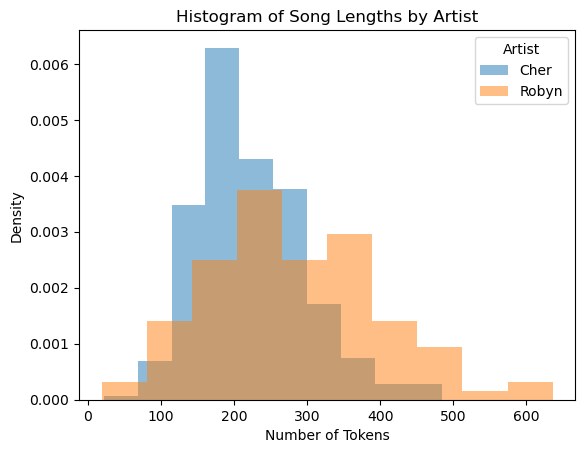

In [47]:
# Function to extract the song lengths
def extract_song_lengths(data_location, lyrics_folder):
    song_lengths = []

    # Open the zip file
    with zipfile.ZipFile(data_location, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if file_info.filename.startswith(lyrics_folder) and file_info.filename.endswith('.txt'):
                filename = file_info.filename

                with zip_ref.open(file_info.filename) as file:
                    lyrics = file.read().decode('utf-8') 
                    tokens = lyrics.split() 
                    num_tokens = len(tokens)

                    # Identify the artist 
                    if 'cher' in filename.lower():
                        artist = 'Cher'
                    elif 'robyn' in filename.lower():
                        artist = 'Robyn'
                    else:
                        artist = 'Unknown'  # Default case
                    song_lengths.append((artist, num_tokens))

    return song_lengths

# Use the pre-defined data_location (the ZIP file path) and lyrics_folder
song_lengths = extract_song_lengths(data_location, lyrics_folder)

# If no song lengths were found, stop
if song_lengths:
    df = pd.DataFrame(song_lengths, columns=['artist', 'length'])

    # Plot the histogram of song lengths by artist
    df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)

    # Customize the plot
    plt.title("Histogram of Song Lengths by Artist")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Density")
    plt.legend(title='Artist')
    plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: 


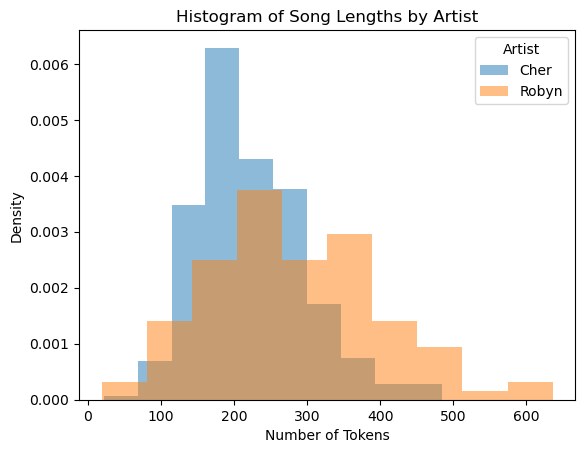

In [48]:
# regular expression to collapse whitespace
collapse_whitespace = re.compile(r'\s+')

# Function to tokenize lyrics by stripping and splitting on whitespace
def tokenize_lyrics(lyric):
    return [item.lower() for item in collapse_whitespace.split(lyric) if item]

# Function to extract the song lengths
def extract_song_lengths(data_location, lyrics_folder):
    song_lengths = []

    # Open the zip file
    with zipfile.ZipFile(data_location, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if file_info.filename.startswith(lyrics_folder) and file_info.filename.endswith('.txt'):
                filename = file_info.filename

                with zip_ref.open(file_info.filename) as file:
                    lyrics = file.read().decode('utf-8')  # Read and decode the file

                    # Tokenize the lyrics
                    tokens = tokenize_lyrics(lyrics)
                    num_tokens = len(tokens)  # Count the number of tokens

                    # Identify the artist
                    if 'cher' in filename.lower():
                        artist = 'Cher'
                    elif 'robyn' in filename.lower():
                        artist = 'Robyn'
                    else:
                        artist = 'Unknown'
                    song_lengths.append((artist, num_tokens))

    return song_lengths

# Use the pre-defined data_location 
song_lengths = extract_song_lengths(data_location, lyrics_folder)

# If no song lengths were found, stop
if song_lengths:
    df = pd.DataFrame(song_lengths, columns=['artist', 'length'])

    # Plot the histogram of song lengths by artist
    df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)

    # Customize the plot
    plt.title("Histogram of Song Lengths by Artist")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Density")
    plt.legend(title='Artist')
    plt.show()

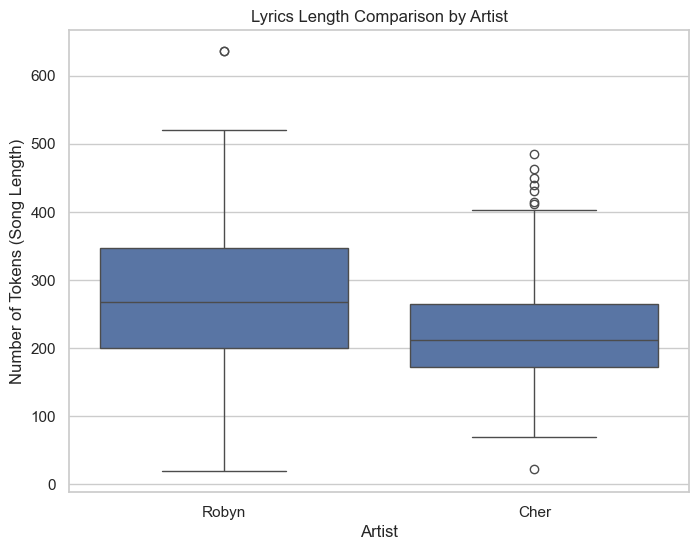

In [51]:
# Assuming song_lengths already contains the song lengths data
df = pd.DataFrame(song_lengths, columns=['artist', 'length'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot to compare song lengths by artist
plt.figure(figsize=(8, 6))
sns.boxplot(x='artist', y='length', data=df)

# Customize the plot
plt.title("Lyrics Length Comparison by Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Tokens (Song Length)")
plt.show()